<a href="https://colab.research.google.com/github/Soob00/20251R0136COSE47101/blob/final_data_preprocess/final_data_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#전처리

연령, 학력, 인종처럼 기본 정보인데도 답하지 않은 경우 : AGE,EDUC,RACE,GENDER,ETHNIC,MARSTAT,VETERAN

In [16]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import csv


In [17]:
df = pd.read_csv("/content/mhcld_puf_2022.csv", quoting=csv.QUOTE_NONE, on_bad_lines='skip')

In [19]:
df_edit = df.copy()

In [18]:
df

,YEAR,AGE,EDUC,ETHNIC,RACE,GENDER,SPHSERVICE,CMPSERVICE,OPISERVICE,RTCSERVICE,...,ODDFLG,PDDFLG,PERSONFLG,SCHIZOFLG,ALCSUBFLG,OTHERDISFLG,STATEFIP,DIVISION,REGION,CASEID
0,2022,14,-9,3,3,2,2,1.0,2.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6.0,3.0,2.022000e+10
1,2022,7,3,3,4,1,2,1.0,2.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6.0,3.0,2.022000e+10
2,2022,8,3,3,-9,2,2,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,3.0,2.022000e+10
3,2022,14,4,4,2,2,1,1.0,2.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6.0,3.0,2.022000e+10
4,2022,3,-9,4,6,2,2,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,3.0,2.022000e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6268095,2022,3,3,3,5,1,2,1.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,48.0,7.0,3.0,2.022627e+10
6268096,2022,13,4,4,5,1,2,1.0,2.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,48.0,7.0,3.0,2.022627e+10
6268097,2022,8,-9,4,6,1,2,1.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,48.0,7.0,3.0,2.022627e+10
6268098,2022,14,5,4,3,2,2,1.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,48.0,7.0,3.0,2.022627e+10


전반적으로 정규화는 이미 잘 된 데이터같은데 문제는 설문조사 이런게 하나로 통합 된 게 아닌거같아서 아예 답변 없는 데이터들이 있는 거 같아요

## 기본적인 전처리

### AGE, EDUC ordinal 변수 0에서 부터 시작

In [20]:
# AGE 조정
df_edit['AGE'] = df_edit['AGE'].apply(lambda x: x - 1 if x > 0 else x)

# EDUC 조정
df_edit['EDUC'] = df_edit['EDUC'].apply(lambda x: x - 1 if x > 0 else x)

### -9가 결측치 말고 해당 없음인 곳 바꿈

해당 없음인 경우 -99로 함.

In [21]:
df_edit.loc[df['EMPLOY'] != 5, 'DETNLF'] = -99
# MH1 유효값은 1~13, -9는 무효로 간주
valid_mh1 = df_edit['MH1'].between(1, 13)

df_edit.loc[df_edit['MH1'] == -9, 'MH1'] = -99
# MH2가 -9이고 MH1만 유효한 경우 → MH2는 해당 없음
df_edit.loc[valid_mh1 & (df_edit['MH2'] == -9), 'MH2'] = -99

# MH3도 동일하게 처리
df_edit.loc[valid_mh1 & (df_edit['MH3'] == -9), 'MH3'] = -99

df_edit.loc[df_edit['SUB'] == -9, 'SUB'] = -99

df_edit.loc[df_edit['SAP'] == -9, 'SAP'] = -99

### 예 아니오 인 경우 1,2 인 거 0 1 로 변수 고정

In [22]:
var=['SPHSERVICE','CMPSERVICE','RTCSERVICE','IJSSERVICE','VETERAN']
for col in var:
    df_edit[col] = df_edit[col].replace(2, 0)

## 결측시각화

In [ ]:
df_missing = df_edit.replace(-9, pd.NA)
msno.matrix(df_missing)
msno.heatmap(df_missing)

여기서 특정 칼럼이 결측치가 너무 많아서 이게 왜 이런지 좀 알아봐야할 것 같음

EDUC가 -9 너무 많아서 지역별로 EDUC 결측 비율 봤는데 설문조사가 지역별로 다른 거 같다.

In [ ]:
df_edit['EDUC_missing'] = df_edit['EDUC'] == -9
edu_missing_by_state = df_edit.groupby('STATEFIP')['EDUC_missing'].mean().sort_values(ascending=False)
print(edu_missing_by_state.head())


STATEFIP
5     1.0
6     1.0
19    1.0
35    1.0
44    1.0
Name: EDUC_missing, dtype: float64


단순하게 결측치 있는걸 다 삭제해버리면 데이터 양이 1/6 이 됨 이래도 100만개긴한데

required_cols : 결측치 존재하는데 결측치가 있으면 안되는 칼럼 모음

### 모든 -9 행들이 제거된 데이터

In [ ]:
required_cols = ['AGE', 'GENDER', 'RACE', 'ETHNIC', 'MARSTAT', 'VETERAN', 'EDUC', 'EMPLOY']
df_row_filtered = df_edit[~df_edit.isin([-9]).any(axis=1)]  # -9 있는 행 제거


In [ ]:
(df_row_filtered == -9).any(axis=1).sum()


np.int64(0)

In [ ]:
len(df_row_filtered)

1066085

In [ ]:
df_row_filtered.to_csv("-9row_remove.csv", index=False)


## 지역별로 결측 비율

In [ ]:

# -9를 NaN으로 바꿔서 결측 처리
df_replaced = df[required_cols + ['DIVISION']].replace(-9, pd.NA)

# 주별 결측률 계산 함수
missing_by_state = df_replaced.groupby('DIVISION').apply(lambda g: g.isna().mean())

# 보기 좋게 퍼센트화
missing_by_state = missing_by_state * 100


<ipython-input-27-6ddfddf1e198>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_state = df_replaced.groupby('DIVISION').apply(lambda g: g.isna().mean())


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

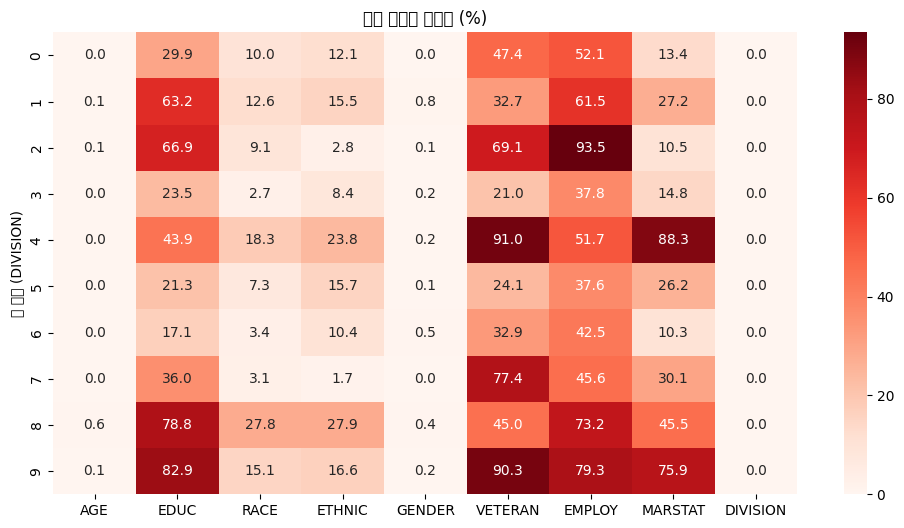

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_state, cmap='Reds', annot=True, fmt=".1f")
plt.title("주별 변수별 결측률 (%)")
plt.ylabel("주 코드 (DIVISION)")
plt.show()


division 9 소속 주 별

In [ ]:
division9_states = [53, 41, 15, 6, 2]  # Washington, Oregon, Hawaii, California, Alaska


In [ ]:
# -9를 NA로 바꾸고 필요한 변수만 유지
df_div9 = df[df['STATEFIP'].isin(division9_states)]
df_div9_clean = df_div9[required_cols + ['STATEFIP']].replace(-9, pd.NA)

# 주별 결측률 계산
missing_by_state_div9 = df_div9_clean.groupby('STATEFIP').apply(lambda g: g.isna().mean()) * 100


<ipython-input-33-353385c9c44c>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_state_div9 = df_div9_clean.groupby('STATEFIP').apply(lambda g: g.isna().mean()) * 100


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

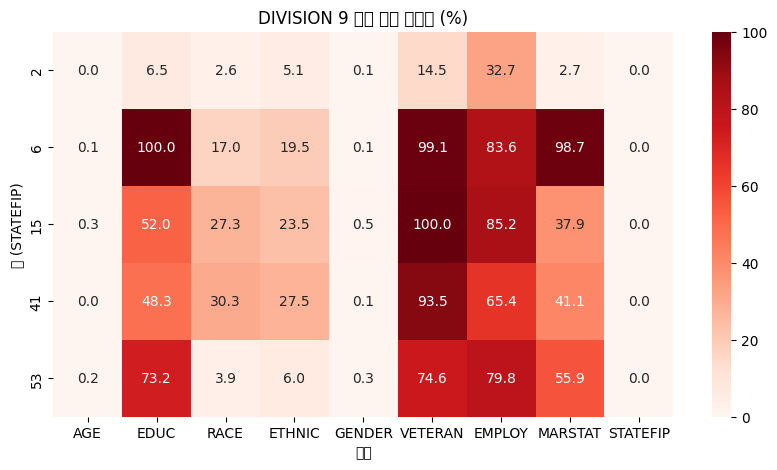

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(missing_by_state_div9, annot=True, cmap="Reds", fmt=".1f")
plt.title("DIVISION 9 주요 변수 결측률 (%)")
plt.ylabel("주 (STATEFIP)")
plt.xlabel("변수")
plt.show()

지역 별로 설문조사 칼럼이 좀 다른듯

### 주 별 결측치 비율

In [ ]:

# 결측 여부 플래그
df['ANY_MISSING_STATE'] = df[required_cols].isin([-9]).any(axis=1)


In [ ]:
# 전체 수
total_state = df['STATEFIP'].value_counts(normalize=True) * 100

# 결측 그룹
missing_state = df[df['ANY_MISSING_STATE']]['STATEFIP'].value_counts(normalize=True) * 100

# 비결측 그룹
non_missing_state = df[~df['ANY_MISSING_STATE']]['STATEFIP'].value_counts(normalize=True) * 100

# 비교 테이블 생성
state_comp = pd.DataFrame({
    'total rate': total_state,
    'missing rate': missing_state,
    'non missing rate': non_missing_state
}).fillna(0)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


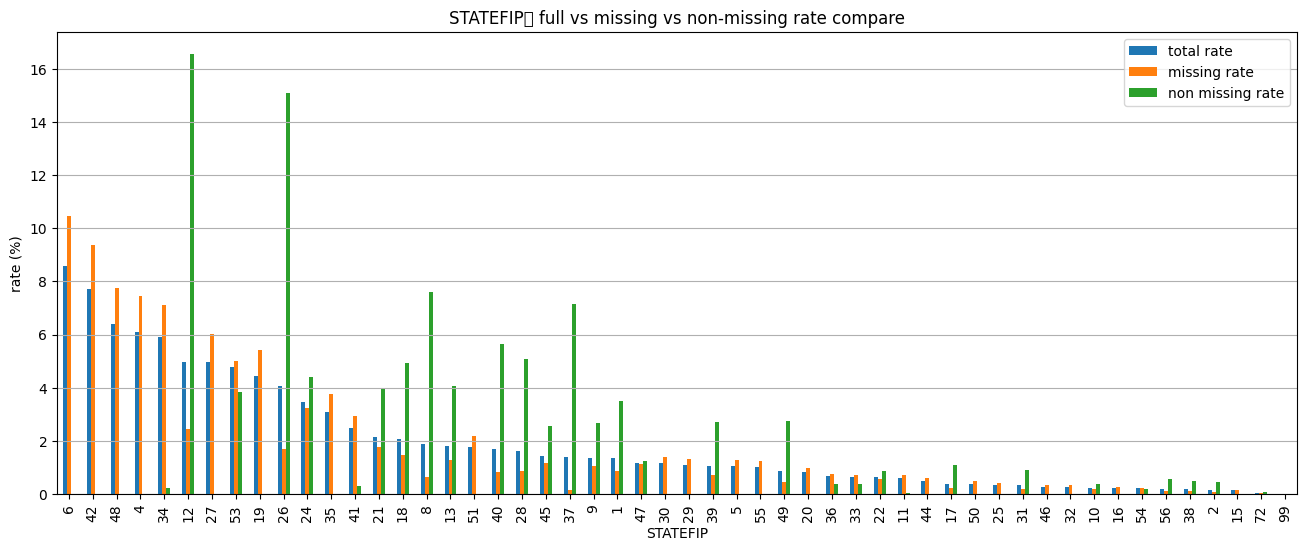

In [ ]:
state_comp.sort_values('total rate', ascending=False).plot(kind='bar', figsize=(16,6))
plt.title("STATEFIP별 full vs missing vs non-missing rate compare")
plt.ylabel("rate (%)")
plt.grid(axis='y')
plt.show()


STATEFIP == 6 (California), 42, 48, 4 : 결측이 많음

STATEFIP == 53, 19, 26 : 결측이 별로 없음

주별로 설문조사 문항이 달랐던 거 같아서 그런 경우 분리할 예정

## REGION도 있어서 이것도 시각화

<ipython-input-16-ec520c608995>:13: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-ec520c608995>:13: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-ec520c608995>:13: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-ec520c608995>:13: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-ec520c608995>:13: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-ec520c608995>:13: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(

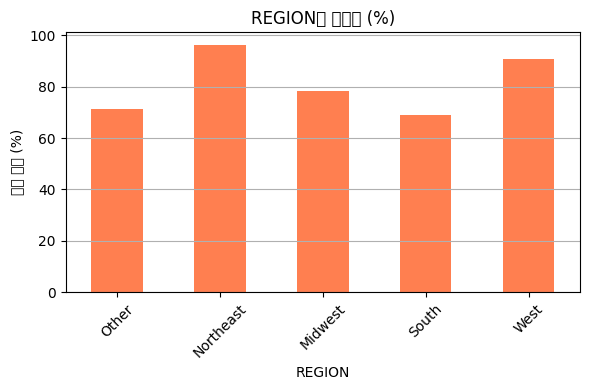

In [ ]:

df['ANY_MISSING_REGION'] = df[required_cols].isin([-9]).any(axis=1)
region_labels = ['Other', 'Northeast', 'Midwest', 'South', 'West']

missing_rate_by_region = df.groupby('REGION')['ANY_MISSING_REGION'].mean() * 100

plt.figure(figsize=(6,4))
missing_rate_by_region.plot(kind='bar', color='coral')
plt.xticks(ticks=range(5), labels=region_labels, rotation=45)
plt.title("REGION별 결측률 (%)")
plt.ylabel("결측 비율 (%)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


이거는 범위가 너무 커서 주 별로 나누는 게 좋을 것 같다!

## 결측치가 존재하는 집단 , 결측치 없는 집단 정신질환 비교해봄


결론 : 여기는 별 차이 없는 듯.


[결측집단] MH1 분포:
MH1
-9.0     0.091436
 1.0     0.141840
 2.0     0.125226
 3.0     0.059438
 4.0     0.010096
 5.0     0.004418
 6.0     0.063941
 7.0     0.186871
 8.0     0.009013
 9.0     0.017152
 10.0    0.002888
 11.0    0.104032
 12.0    0.093718
 13.0    0.089930
 NaN     0.000001
Name: proportion, dtype: float64

[결측집단] MH2 분포:
MH2
-9.0     0.717806
 1.0     0.039541
 2.0     0.083874
 3.0     0.022201
 4.0     0.003507
 5.0     0.001731
 6.0     0.013760
 7.0     0.041469
 8.0     0.006598
 9.0     0.005315
 10.0    0.006717
 11.0    0.015229
 12.0    0.002193
 13.0    0.040060
 NaN     0.000001
Name: proportion, dtype: float64

[결측집단] MH3 분포:
MH3
-9.0     0.932267
 1.0     0.013091
 2.0     0.018096
 3.0     0.007455
 4.0     0.001051
 5.0     0.000480
 6.0     0.002062
 7.0     0.006392
 8.0     0.001756
 9.0     0.001499
 10.0    0.003951
 11.0    0.001489
 12.0    0.000320
 13.0    0.010089
 NaN     0.000001
Name: proportion, dtype: float64

[결측집단] 정신질환 flag 변수 비율:
DEPRES

<Axes: title={'center': '정신질환 비율: 전체 vs 결측 집단'}>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51656 (\N{HANGUL SYLLABLE JIL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) 

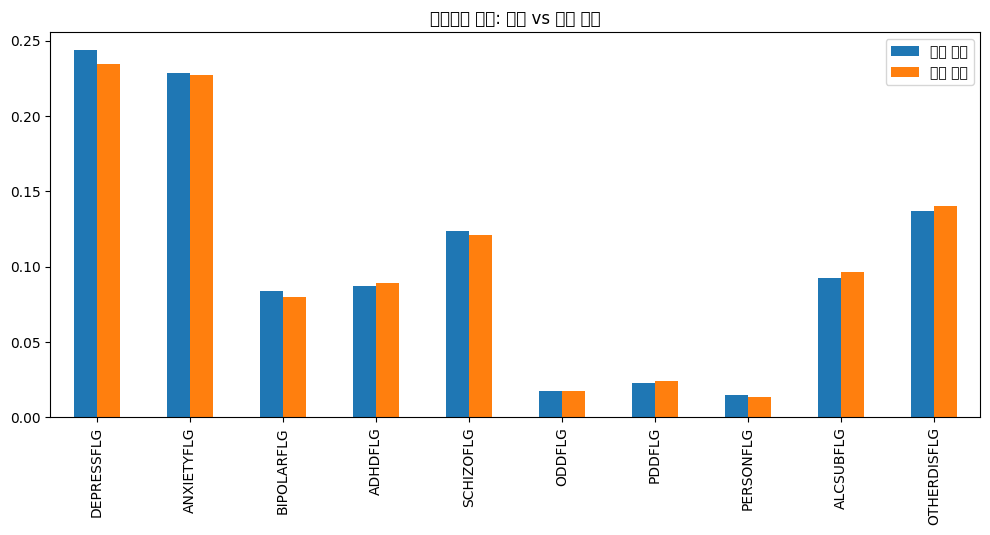

In [ ]:

df_missing = df[df[required_cols].isin([-9]).any(axis=1)]
mh_vars = ['MH1', 'MH2', 'MH3', 'NUMMHS',
           'DEPRESSFLG', 'ANXIETYFLG', 'BIPOLARFLG', 'ADHDFLG',
           'SCHIZOFLG', 'ODDFLG', 'PDDFLG', 'PERSONFLG', 'ALCSUBFLG', 'OTHERDISFLG']
for mh_col in ['MH1', 'MH2', 'MH3']:
    print(f"\n[결측집단] {mh_col} 분포:")
    print(df_missing[mh_col].value_counts(dropna=False, normalize=True).sort_index())
print("\n[결측집단] 정신질환 flag 변수 비율:")
print(df_missing[mh_vars[4:]].mean().sort_values(ascending=False))
# 전체 flag 평균
all_flag_dist = df[mh_vars[4:]].mean()
missing_flag_dist = df_missing[mh_vars[4:]].mean()

# 비교 테이블
compare_df = pd.DataFrame({
    '전체 집단': all_flag_dist,
    '결측 집단': missing_flag_dist
})
compare_df['차이'] = compare_df['결측 집단'] - compare_df['전체 집단']
print(compare_df.sort_values(by='차이', ascending=False))
compare_df[['전체 집단', '결측 집단']].plot(kind='bar', figsize=(12,5), title="정신질환 비율: 전체 vs 결측 집단")


## STATEFIP 별로 결측치 비율

In [ ]:
df = pd.read_csv("/content/mhcld_puf_2022.csv")
neg9_ratio_by_state = df.groupby("STATEFIP")[required_cols].apply(
    lambda g: (g == -9).mean() * 100
)

<ipython-input-24-2ed3fa8a464d>:8: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-24-2ed3fa8a464d>:8: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-24-2ed3fa8a464d>:8: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-24-2ed3fa8a464d>:8: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-24-2ed3fa8a464d>:8: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-24-2ed3fa8a464d>:8: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-24-2ed3fa8a464d>:8: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-inp

<Figure size 1600x800 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

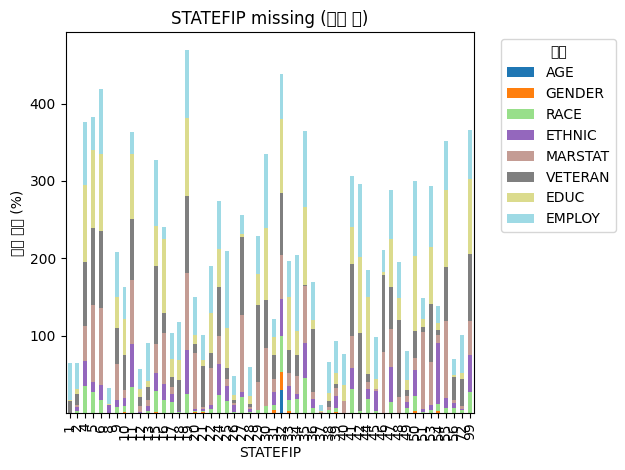

In [ ]:
plt.figure(figsize=(16, 8))
neg9_ratio_by_state.plot(kind='bar', stacked=True, colormap='tab20')
plt.title("STATEFIP missing (전체 주)")
plt.ylabel("결측 비율 (%)")
plt.xlabel("STATEFIP")
plt.xticks(rotation=90)
plt.legend(title="변수", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
print(neg9_ratio_by_state)

                AGE     GENDER       RACE     ETHNIC     MARSTAT     VETERAN  \
STATEFIP                                                                       
1          0.000000   0.000000   0.003221   0.000000    0.032206   15.720712   
2          0.010595   0.105955   2.574698   5.128205    2.670057   14.505192   
4          0.000000   0.000000  34.236228  33.079833   44.983463   82.628424   
5          0.001384   0.081643  26.437052  13.208148  100.000000  100.000000   
6          0.114215   0.141139  17.018733  19.530798   98.715539   99.100493   
8          0.000760   0.001521   0.012166   9.910657    0.272212    0.529217   
9          0.021300   0.166139   6.929934   9.109982   46.694783   46.677743   
10         0.006174   0.753226   7.754522  11.144039   10.674816   44.076063   
11         0.000000   0.313800  32.763580  55.476049   82.788542   79.828836   
12         0.000867   0.000000   0.008090   0.904113    7.904705   11.986940   
13         0.001608   0.136666   2.91178

In [ ]:
high_missing_states = neg9_ratio_by_state[(neg9_ratio_by_state >= 80).any(axis=1)]

# 결과 확인
print(high_missing_states)

                AGE     GENDER       RACE     ETHNIC     MARSTAT     VETERAN  \
STATEFIP                                                                       
4          0.000000   0.000000  34.236228  33.079833   44.983463   82.628424   
5          0.001384   0.081643  26.437052  13.208148  100.000000  100.000000   
6          0.114215   0.141139  17.018733  19.530798   98.715539   99.100493   
11         0.000000   0.313800  32.763580  55.476049   82.788542   79.828836   
15         0.336627   0.521229  27.277663  23.531328   37.854273  100.000000   
16         0.296482   0.144947  16.523916  20.061932   65.792595   26.459349   
19         0.052715   0.083438  24.990621  55.885929  100.000000  100.000000   
25         0.000000   0.000000  15.851858  19.210893    9.010746   14.039045   
27         0.001449   0.032744  20.588116   6.372898  100.000000  100.000000   
29         0.000000   0.014607   3.463157   0.003984   36.175920  100.000000   
30         0.000000   0.000000   8.56996

In [ ]:
# 각 주마다 80% 이상 결측이 있는 컬럼만 뽑기
high_missing_cols_by_state = {}

for state, row in neg9_ratio_by_state.iterrows():
    high_missing_cols = row[row >= 80].index.tolist()
    if high_missing_cols:  # 하나라도 있다면
        high_missing_cols_by_state[state] = high_missing_cols

# 결과 보기
for state, cols in high_missing_cols_by_state.items():
    print(f"STATEFIP {state}: 결측률 80% 이상 컬럼 → {cols}")

STATEFIP 4: 결측률 80% 이상 컬럼 → ['VETERAN', 'EDUC', 'EMPLOY']
STATEFIP 5: 결측률 80% 이상 컬럼 → ['MARSTAT', 'VETERAN', 'EDUC']
STATEFIP 6: 결측률 80% 이상 컬럼 → ['MARSTAT', 'VETERAN', 'EDUC', 'EMPLOY']
STATEFIP 11: 결측률 80% 이상 컬럼 → ['MARSTAT', 'EDUC']
STATEFIP 15: 결측률 80% 이상 컬럼 → ['VETERAN', 'EMPLOY']
STATEFIP 16: 결측률 80% 이상 컬럼 → ['EDUC']
STATEFIP 19: 결측률 80% 이상 컬럼 → ['MARSTAT', 'VETERAN', 'EDUC', 'EMPLOY']
STATEFIP 25: 결측률 80% 이상 컬럼 → ['EMPLOY']
STATEFIP 27: 결측률 80% 이상 컬럼 → ['MARSTAT', 'VETERAN']
STATEFIP 29: 결측률 80% 이상 컬럼 → ['VETERAN']
STATEFIP 30: 결측률 80% 이상 컬럼 → ['EDUC', 'EMPLOY']
STATEFIP 32: 결측률 80% 이상 컬럼 → ['VETERAN', 'EDUC']
STATEFIP 34: 결측률 80% 이상 컬럼 → ['EMPLOY']
STATEFIP 35: 결측률 80% 이상 컬럼 → ['EDUC', 'EMPLOY']
STATEFIP 36: 결측률 80% 이상 컬럼 → ['VETERAN']
STATEFIP 41: 결측률 80% 이상 컬럼 → ['VETERAN']
STATEFIP 42: 결측률 80% 이상 컬럼 → ['VETERAN', 'EDUC', 'EMPLOY']
STATEFIP 44: 결측률 80% 이상 컬럼 → ['EDUC']
STATEFIP 46: 결측률 80% 이상 컬럼 → ['VETERAN']
STATEFIP 48: 결측률 80% 이상 컬럼 → ['VETERAN']
STATEFIP 50: 결측률 80% 이상 컬럼 

In [ ]:
df_high_missing = pd.DataFrame([
    {'STATEFIP': state, 'High Missing Columns': ', '.join(cols)}
    for state, cols in high_missing_cols_by_state.items()
])


## 실수로 빈 항목들이 있는 행만 제거된 데이터

In [23]:
# 1. 각 열의 -9 비율 계산
missing_ratio = (df_edit == -9).mean()

# 2. 결측률이 20% 이하인 열 이름만 선택
columns_under_20pct = missing_ratio[missing_ratio <= 0.20].index

# 4. 이 열들 중에서 -9가 포함된 행을 추출 (제거 대상)
rows_to_drop = df_edit[columns_under_20pct][(df_edit[columns_under_20pct] == -9).any(axis=1)]

# 5. 이 행들을 제거한 새로운 데이터프레임 만들기
df_cleaned = df_edit.drop(rows_to_drop.index)

# 6. 제거된 행들 따로 저장
df_dropped = df_edit.loc[rows_to_drop.index].copy()

In [24]:
df_cleaned.to_csv("missing_drop_data.csv", index=False) #실수로 빈 항목들이 있는 행만 제거된 데이터
df_dropped.to_csv("dropped_due_to_missing.csv", index=False) #제거된 행만 모여있는 데이터


In [28]:
target_cols = ['VETERAN', 'EDUC', 'EMPLOY', 'MARSTAT']
df_dropped_col = df_cleaned.drop(columns=target_cols)#  지역따라 결측이 심한 열들이 제거된 데이터

In [29]:
df_dropped_col.to_csv("dropped_region_col.csv", index=False) #제거

# 시각화

In [ ]:
sns.boxplot(x='EMPLOY', y='NUMMHS', data=df_cleaned)
plt.title("고용 상태별 정신질환 진단 수")
plt.xlabel("고용 상태")
plt.ylabel("진단 수")
plt.show()